In [1]:
import pandas as pd
import numpy as np
import os,sys

import seaborn as sns
import matplotlib.pyplot as plt
from aux import fitCPH_and_plotKM_treatments

%matplotlib inline

In [2]:
annot = pd.read_csv("data/HH.sample_annotation_v3_166.tsv",sep ="\t",index_col=0)
annot.head(2)

,bevacizumab,standard,age,FIGO_I-IIIB,FIGO_IIIC,FIGO_IV,OP_0,OP_1,OP_2,OS_time,OS_event,PFS_time,PFS_event
sample_id,,,,,,,,,,,,,
T0063,0,1,53.0,0,1,0,0,1,0,39.0,1.0,8.0,1.0
T0096,0,1,43.0,0,1,0,1,0,0,61.0,1.0,59.0,1.0


### Limit observation by month 100

In [3]:
max_time = 100
for e in  ["OS","PFS"]:
    a = annot.loc[annot[e+"_time"]>max_time,:]
    if a.shape[0]>0:
        print(a.loc[:,[e+"_event","bevacizumab"]])
        remove_event = a.loc[a[e+"_event"]==1,:].index.values
        print(e+"_event", "removed:", len(remove_event))
        annot.loc[remove_event,[e+"_event"]] = 0
        annot.loc[annot[e+"_time"]>max_time,e+"_time"] = max_time
    else:
        print(e,"no patients affected")

           OS_event  bevacizumab
sample_id                       
T0294           0.0            0
T0305           0.0            0
T0315           0.0            0
T1992           1.0            0
T2522           0.0            0
T2645           0.0            0
T3278           1.0            0
T3473           0.0            0
T4817           0.0            0
T6313           0.0            0
OS_event removed: 2
           PFS_event  bevacizumab
sample_id                        
T0294            0.0            0
T0305            0.0            0
T0315            0.0            0
T2522            0.0            0
T2645            0.0            0
T3473            0.0            0
PFS_event removed: 0


,bevacizumab,standard,age,FIGO_I-IIIB,FIGO_IIIC,FIGO_IV,OP_0,OP_1,OP_2,OS_time,OS_event,PFS_time,PFS_event
sample_id,,,,,,,,,,,,,
T0063,0,1,53.0,0,1,0,0,1,0,39.0,1.0,8.0,1.0
T0096,0,1,43.0,0,1,0,1,0,0,61.0,1.0,59.0,1.0
T0294,0,1,45.0,1,0,0,1,0,0,100.0,0.0,100.0,0.0
T0305,0,1,53.0,0,1,0,0,1,0,100.0,0.0,100.0,0.0
T0315,0,1,55.0,0,1,0,1,0,0,100.0,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
T6993,1,0,55.0,0,1,0,0,1,0,36.0,0.0,36.0,0.0
T6995,1,0,65.0,0,1,0,1,0,0,27.0,0.0,16.0,1.0
T6999,1,0,54.0,0,1,0,1,0,0,58.0,0.0,58.0,0.0


p-value=0.01
HR=0.56(0.36-0.88)


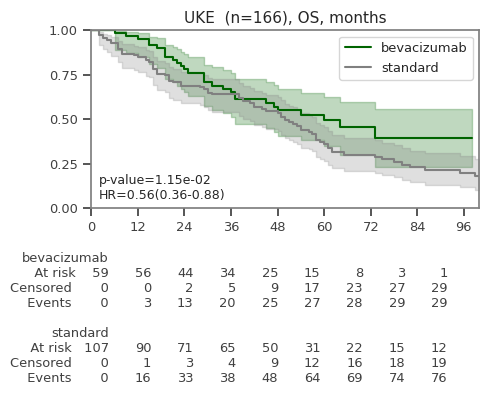

In [4]:
covariates = ["age","FIGO_IIIC","FIGO_IV","OP_1","OP_2", "bevacizumab"]
surv = "OS"
surv_event=surv+"_event"
surv_time=surv+"_time"

fitCPH_and_plotKM_treatments(annot,
                  surv_event=surv_event,
                  surv_time=surv_time,
                  covariates=covariates,
                  title = "%s  (n=%s), %s, months"%("UKE",annot.shape[0],surv))

p-value=0.17
HR=0.78(0.54-1.12)


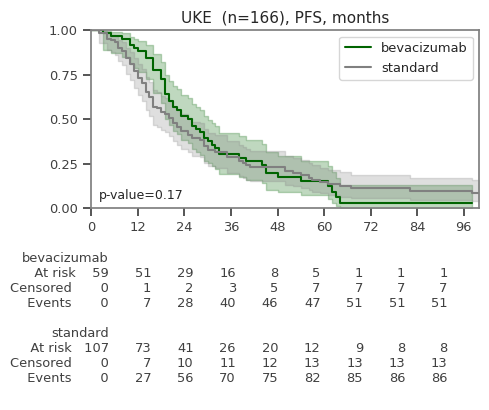

In [5]:
surv = "PFS"
surv_event=surv+"_event"
surv_time=surv+"_time"
fitCPH_and_plotKM_treatments(annot,
                  surv_event=surv_event,
                  surv_time=surv_time,
                  covariates=covariates,
                  title = "%s  (n=%s), %s, months"%("UKE",annot.shape[0],surv))